In [6]:
import random, torch

In [7]:
manualSeed = 42
random.seed(manualSeed)
torch.manual_seed(manualSeed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
from gan import datasets, networks, training, utils

# MNIST

In [7]:
mnist = datasets.fetch_mnist()

In [8]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                         shuffle=True, drop_last = True, num_workers=2)

In [8]:
latent_dim = 100
feature_map_size = 64

gen_net = networks.Generator(latent_dim = latent_dim, feature_map_size = feature_map_size).to(device)
disc_net = networks.Discriminator().to(device)

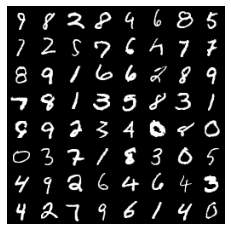

In [9]:
dataloader = torch.utils.data.DataLoader(mnist.data, batch_size=128,
                                         shuffle=True, drop_last = True, num_workers=2)

utils.plot_img(next(iter(dataloader))[:64], file_name = "real_mnist.jpg")

Starting Training Loop...
[0/20][0/546] Loss_D: 1.492 Loss_G 0.838 D(x): 0.442
[0/20][50/546] Loss_D: 1.243 Loss_G 1.039 D(x): 0.628
[0/20][100/546] Loss_D: 1.031 Loss_G 1.422 D(x): 0.599
[0/20][150/546] Loss_D: 0.93 Loss_G 1.727 D(x): 0.594
[0/20][200/546] Loss_D: 1.297 Loss_G 1.026 D(x): 0.503
[0/20][250/546] Loss_D: 1.155 Loss_G 0.973 D(x): 0.569
[0/20][300/546] Loss_D: 1.118 Loss_G 1.243 D(x): 0.567
[0/20][350/546] Loss_D: 1.183 Loss_G 0.94 D(x): 0.544
[0/20][400/546] Loss_D: 1.195 Loss_G 0.799 D(x): 0.52
[0/20][450/546] Loss_D: 1.204 Loss_G 0.862 D(x): 0.516
[0/20][500/546] Loss_D: 1.184 Loss_G 1.396 D(x): 0.67
[1/20][0/546] Loss_D: 1.17 Loss_G 1.029 D(x): 0.555
[1/20][50/546] Loss_D: 1.209 Loss_G 0.892 D(x): 0.563
[1/20][100/546] Loss_D: 1.176 Loss_G 0.882 D(x): 0.579
[1/20][150/546] Loss_D: 1.212 Loss_G 0.896 D(x): 0.538
[1/20][200/546] Loss_D: 1.228 Loss_G 0.759 D(x): 0.53
[1/20][250/546] Loss_D: 1.259 Loss_G 0.863 D(x): 0.563
[1/20][300/546] Loss_D: 1.201 Loss_G 0.902 D(x): 0.

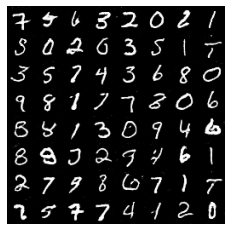

In [10]:
training.train(gen_net, disc_net, dataloader, device)

# CelebA

In [ ]:
"""
You should first download the data with `kaggle datasets download -d jessicali9530/celeba-dataset`
and unzip it at the right place
"""
celeba_path = "/SSD/dataset/celeba/img_align_celeba/"

In [10]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [11]:
dataset = dset.ImageFolder(root=celeba_path,
                           transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

In [12]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                         shuffle=True, drop_last = True, num_workers=2)

In [13]:
batch, _ = next(iter(dataloader))
batch = batch[:64]

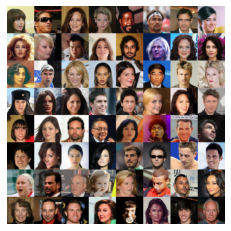

In [14]:
utils.plot_img(batch, img_size = 64, cmap = "rgb", file_name = "real_celeba.jpg")

In [20]:
latent_dim = 100
feature_map_size = 64
img_size = 64

gen_net = networks.Generator(latent_dim = latent_dim, img_res = img_size, img_channels = 3, feature_map_size = feature_map_size).to(device)
disc_net = networks.Discriminator(img_res = img_size, img_channels = 3, feature_map_size = feature_map_size).to(device)

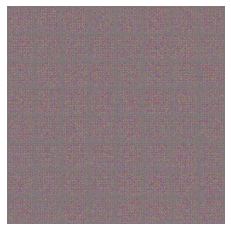

In [21]:
utils.plot_img(gen_net(gen_net.get_fixed_noise(device)).cpu().data, img_size = 64, cmap = "rgb")

In [ ]:
training.train(gen_net, disc_net, dataloader, device, nb_epochs = 50)

Starting Training Loop...
[0/50][0/1582] Loss_D: 1.482 Loss_G 4.747 D(x): 0.494
[0/50][50/1582] Loss_D: 0.552 Loss_G 18.756 D(x): 0.776
[0/50][100/1582] Loss_D: 2.186 Loss_G 19.406 D(x): 0.858
[0/50][150/1582] Loss_D: 2.292 Loss_G 4.521 D(x): 0.232
[0/50][200/1582] Loss_D: 1.507 Loss_G 6.496 D(x): 0.707
[0/50][250/1582] Loss_D: 1.439 Loss_G 4.331 D(x): 0.672
[0/50][300/1582] Loss_D: 0.817 Loss_G 2.979 D(x): 0.692
[0/50][350/1582] Loss_D: 1.11 Loss_G 1.501 D(x): 0.517
[0/50][400/1582] Loss_D: 1.293 Loss_G 1.276 D(x): 0.386
[0/50][450/1582] Loss_D: 0.801 Loss_G 3.042 D(x): 0.78
[0/50][500/1582] Loss_D: 0.86 Loss_G 3.323 D(x): 0.696
[0/50][550/1582] Loss_D: 0.882 Loss_G 3.886 D(x): 0.805
[0/50][600/1582] Loss_D: 0.939 Loss_G 3.501 D(x): 0.73
[0/50][650/1582] Loss_D: 0.929 Loss_G 1.576 D(x): 0.527
[0/50][700/1582] Loss_D: 0.961 Loss_G 4.066 D(x): 0.734
[0/50][750/1582] Loss_D: 1.24 Loss_G 2.237 D(x): 0.563
[0/50][800/1582] Loss_D: 1.063 Loss_G 2.18 D(x): 0.635
[0/50][850/1582] Loss_D: 0.71